In [1]:
import pandas as pd
import numpy as np

In [2]:
#df = pd.read_csv("TitanicDataset.csv")
df = pd.read_csv("train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
import pandas_profiling

In [5]:
report = pandas_profiling.ProfileReport(df)

In [6]:
report.to_file("report.html")

In [7]:
# report

## Outlier Detection and Lambda Use

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [9]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_sample = pd.read_csv("gender_submission.csv")

A simple outliers detection function to fill them 

In [10]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
def detect_outliers(df,n,features):
    """
    takes a dataframe of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according to the Tukey method
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features :
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outliers steps 
        outlier_step = 1.5 * IQR
        
        # determine the list of indices of outliers for feature col 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) |  (df[col] > Q3 + outlier_step)].index
        
        # append the found outliers indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col) # here we store indeces of outliers from each column, one index number comes 
        # multiple times if that row(index) comes as outlier in multiple columns 
        
        # and if that row (index) comes as outlier in more than 2 columns(features)  then we will remove it by using drop() function
        
        
        
    # select observations containing more then 2 outliers (n = 2)
    outlier_indices = Counter(outlier_indices)  # counter function stores data in dict format (key and value)
    # here key is equal to index number and value is equal to its count in ( outlier_indices list created in "for loop") 
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n )
    
    return multiple_outliers 
    
    


In [12]:
# learn more about counter function
# https://www.journaldev.com/20806/python-counter-python-collections-counter


from collections import Counter

# empty Counter
counter = Counter()
print(counter)  # Counter()

# Counter with initial values
counter = Counter(['a', 'a', 'b'])
print(counter)  # Counter({'a': 2, 'b': 1})

counter = Counter(a=2, b=3, c=1)
print(counter)  # Counter({'b': 3, 'a': 2, 'c': 1})

print('*' * 50)


# Iterable as argument for Counter
counter = Counter('abc')
print(counter)  # Counter({'a': 1, 'b': 1, 'c': 1})

# List as argument to Counter
words_list = ['Cat', 'Dog', 'Horse', 'Dog']
counter = Counter(words_list)
print(counter)  # Counter({'Dog': 2, 'Cat': 1, 'Horse': 1})

# Dictionary as argument to Counter
word_count_dict = {'Dog': 2, 'Cat': 1, 'Horse': 1}
counter = Counter(word_count_dict)
print(counter)  # Counter({'Dog': 2, 'Cat': 1, 'Horse': 1})

print('*' * 50)


Counter()
Counter({'a': 2, 'b': 1})
Counter({'b': 3, 'a': 2, 'c': 1})
**************************************************
Counter({'a': 1, 'b': 1, 'c': 1})
Counter({'Dog': 2, 'Cat': 1, 'Horse': 1})
Counter({'Dog': 2, 'Cat': 1, 'Horse': 1})
**************************************************


### Applying outliers to Age, SibSp, Parch and Fare columns

In [13]:
outliers_to_drop = detect_outliers(df_train, 2, ["Age", "SibSp", "Parch", "Fare"] ) # returns indices

df_train = df_train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)

# Overview and Cleaning the Data

In [14]:
## saving passenger id from test set datframe in advance in order to submit later. 
passengerid = df_test.PassengerId

# We will drop PassengerID and Ticket since it will be useless for our data. 
#df_train.drop(['PassengerId'], axis=1, inplace=True)
#df_test.drop(['PassengerId'], axis=1, inplace=True)
df_train.drop(['Ticket'], axis = 1, inplace = True) # axis = 1 (1 means columns) and (0 means rows)
df_test.drop(['Ticket'], axis = 1, inplace = True) 


In [15]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
print(df_train.info())
print('*' * 50)
print(df_test.info())
print('*' * 50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Fare         881 non-null    float64
 9   Cabin        201 non-null    object 
 10  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 75.8+ KB
None
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  

It looks like, the features have unequal amount of data entries for every column and they have many different types of variables. This can happen for the following reasons...

We may have missing values in our features.

We may have categorical features.

We may have alphanumerical or/and text features.

### Dealing with Missing values  

In [17]:
# Let's write a functin to print the total percentage of the missing values.
def missing_percentage(df):
    """
    This function takes a DataFrame(df) as input and 
    returns two columns, total missing values and total missing values percentage
    
    """    
    total = df.isnull().sum().sort_values(ascending = False) # type(total) : pandas.core.series.Series
    percentage = round( total/len(df) * 100, 2) # round off to two digits type(percentage) : pandas.core.series.Series
    return pd.concat([total, percentage], axis = 1, keys = ["Total Missing Values", "Missing Values Percent"])
    

In [18]:
# missing values in training set
missing_percentage(df_train)

,Total Missing Values,Missing Values Percent
Cabin,680,77.19
Age,170,19.30
Embarked,2,0.23
Fare,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00
Survived,0,0.00


In [19]:
# missing values in test set
missing_percentage(df_test)

,Total Missing Values,Missing Values Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00
PassengerId,0,0.00


We see that in both train, and test dataset have missing values. Let's make an effort to fill these missing values starting with "Embarked" feature.

### Embarke feature

In [20]:
def percent_value_counts(df, feature):
    """
    Useful for categorical features :
    this function takes dataframe and column name and finds the percentage of the value counts
    
    """
    total = pd.DataFrame(df.loc[:, feature].value_counts(dropna = False)) # type(total) : pandas.core.frame.DataFrame
    percent = pd.DataFrame(round(df.loc[:, feature].value_counts(dropna = False, normalize = True)*100, 2))
    
    total.columns = ["Total"]
    percent.columns = ["Percent"]
    
    return pd.concat([total, percent], axis = 1)

In [21]:
percent_value_counts(df_train, "Embarked")

,Total,Percent
S,634,71.96
C,168,19.07
Q,77,8.74
NaN,2,0.23


It looks like there are only two null values( ~ 0.22 %) in the Embarked feature, we can replace these with the mode value "S". However, let's dig a little deeper.

#### Let's see what are those two null values

In [22]:
df_train[df_train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,B28,NaN


We may be able to solve these two missing values by looking at other independent variables of the two raws. Both passengers paid a fare of $80, are of Pclass 1 and female Sex. Let's see how the Fare is distributed among all Pclass and Embarked feature values

c:\users\hp\anaconda3\envs\newml\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


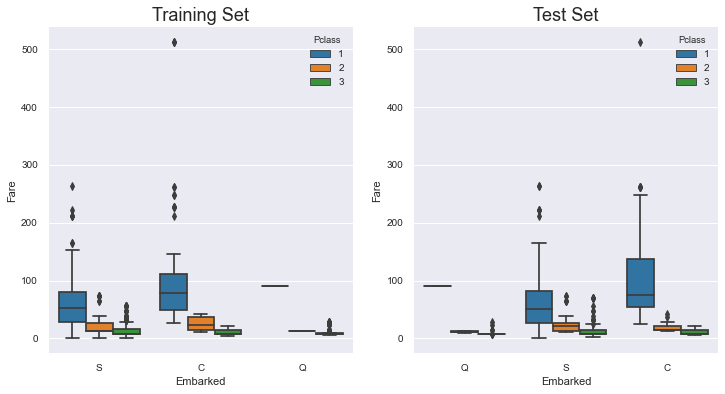

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (12,6), ncols = 2)
ax1 = sns.boxplot(x = "Embarked", y = "Fare", hue = "Pclass", data = df_train, ax = ax[0])
ax2 = sns.boxplot(x = "Embarked", y = "Fare", hue = "Pclass", data = df_test, ax = ax[1])
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title("Test Set", fontsize = 18)


# ## Fixing legends
# leg_1 = ax1.get_legend()
# leg_1.set_title("PClass")
# legs = leg_1.texts
# legs[0].set_text('Upper')
# legs[1].set_text('Middle')
# legs[2].set_text('Lower')

fig.show()

Here, in both training set and test set, the average fare closest to $80 are in the C Embarked values where pclass is 1. So, let's fill in the missing values as "C"

In [24]:
## Replacing the null values in the Embarked column with the mode. 

df_train.Embarked.fillna("C", inplace = True)

### Cabin Feature


In [25]:
# Let's write a functin to print the total percentage of the missing values.
def missing_percentage_single_feature(df, feature):
    """
    This function takes a DataFrame(df) as input and 
    returns two columns, total missing values and total missing values percentage
    
    """    
    total = df[feature].isnull().sum() # type(total) : pandas.core.series.Series
    total = pd.Series(total)
    percentage = round( total/len(df) * 100, 2) # round off to two digits type(percentage) : pandas.core.series.Series
    percentage = pd.Series(percentage)
    Name = pd.Series(feature)
    total_values = pd.Series(len(df[feature]))
    
    return pd.concat([Name, total_values, total, percentage], axis = 1, keys = ["Feature Name", "Total Values", "Total Missing Values", "Missing Values Percent"] )

In [26]:
#missing_percentage_single_feature(df_train, "Cabin")
print("training set Cabin missing values")
missing_percentage_single_feature(df_train, "Cabin")



training set Cabin missing values


,Feature Name,Total Values,Total Missing Values,Missing Values Percent
0,Cabin,881,680,77.19


In [27]:
print("test set Cabin missing values")
missing_percentage_single_feature(df_test, "Cabin")

test set Cabin missing values


,Feature Name,Total Values,Total Missing Values,Missing Values Percent
0,Cabin,418,327,78.23


In [28]:
len(df_train), len(df_train["Cabin"])

(881, 881)

In [29]:
def percent_value_counts(df, feature):
    """
    Useful for categorical features :
    this function takes dataframe and column name and finds the percentage of the value counts
    
    """
    total = pd.DataFrame(df.loc[:, feature].value_counts(dropna = False)) # type(total) : pandas.core.frame.DataFrame
    percent = pd.DataFrame(round(df.loc[:, feature].value_counts(dropna = False, normalize = True)*100, 2))
    
    total.columns = ["Total"]
    percent.columns = ["Percent"]
    
    return pd.concat([total, percent], axis = 1)

Approximately 77% of Cabin feature is missing in the training data and 78% missing on the test data. We have two choices,

we can either get rid of the whole feature, or
we can brainstorm a little and find an appropriate way to put them in use. For example, We may say passengers with cabin record had a higher socio-economic-status then others. We may also say passengers with cabin record were more likely to be taken into consideration when loading into the boat.
Let's combine train and test data first and for now, will assign all the null values as "N"

In [30]:
## Concat train and test into a variable "all_data"
survivers = df_train.Survived

df_train.drop(["Survived"], axis = 1, inplace = True)

all_data = pd.concat([df_train, df_test], ignore_index = False)

# Assign all the null values to N
all_data.Cabin.fillna("N", inplace = True)

In [31]:
all_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,N,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,N,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,N,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,N,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,N,S


All the cabin names start with an English alphabet following by multiple digits. It seems like there are some passengers that had booked multiple cabin rooms in their name. This is because many of them travelled with family. However, they all seem to book under the same letter followed by different numbers. It seems like there is a significance with the letters rather than the numbers. Therefore, we can group these cabins according to the letter of the cabin name.

In [32]:
all_data["Cabin"] = [character[0] for character in all_data["Cabin"] ]

In [33]:
percent_value_counts(all_data, "Cabin")

,Total,Percent
N,1007,77.52
C,91,7.01
B,65,5.00
D,46,3.54
E,41,3.16
A,22,1.69
F,21,1.62
G,5,0.38
T,1,0.08


So, We still haven't done any effective work to replace the null values. Let's stop for a second here and think through how we can take advantage of some of the other features here.

We can use the average of the fare column We can use pythons groupby function to get the mean fare of each cabin letter.

In [34]:
all_data.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
378,386,2,"Davies, Mr. Charles Henry",male,18.0,0,0,73.5000,N,S
452,460,3,"O'Connor, Mr. Maurice",male,NaN,0,0,7.7500,N,Q
682,690,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,211.3375,B,S
283,289,2,"Hosono, Mr. Masabumi",male,42.0,0,0,13.0000,N,S
552,560,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,17.4000,N,S
434,442,3,"Hampe, Mr. Leon",male,20.0,0,0,9.5000,N,S
792,801,2,"Ponesell, Mr. Martin",male,34.0,0,0,13.0000,N,S
460,468,1,"Smart, Mr. John Montgomery",male,56.0,0,0,26.5500,N,S
30,32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,146.5208,B,C
505,513,1,"McGough, Mr. James Robert",male,36.0,0,0,26.2875,E,S


In [35]:
all_data.groupby("Cabin")["Fare"].mean().sort_values(ascending = True)

Cabin
G     14.205000
F     18.079367
N     18.781891
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    102.814288
B    122.383078
Name: Fare, dtype: float64

Now, these means can help us determine the unknown cabins, if we compare each unknown cabin rows with the given mean's above. Let's write a simple function so that we can give cabin names based on the means.

In [36]:
def cabin_estimator(i):
    """
    grouping cabin feature by the first letter
    
    """
    a = 0
    
    if i < 16 :
        a = "G"
    elif i>=16 and i< 27 :
        a = "F"
    elif i>=27 and i< 35 :
        a = "T"
    elif i>= 35 and i<42 :
        a = "A"
    elif i>= 42 and i< 53 :
        a = "E"
    elif i>= 53 and i< 54 :
        a = "D"
    elif i>= 54 and i< 116 :
        a = "C"
    else :
        a = "B"
        
    return a 
     

Let's apply cabin_estimator function in each unknown cabins(cabin with null values). Once that is done we will separate our train and test to continue towards machine learning modeling.

In [37]:
with_N = all_data[all_data["Cabin"] == "N"]
without_N = all_data[all_data["Cabin"] != "N"]

In [38]:
with_N

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,N,S
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,N,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,N,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,8.4583,N,Q
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,N,S
...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,7.7750,N,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,N,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,N,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,N,S


In [39]:
without_N

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E,S
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,G,S
11,12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.5500,C,S
...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,27.7208,D,C
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,13.8625,D,C
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,211.5000,C,C
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,90.0000,C,Q


In [40]:
##applying cabin estimator function. 
with_N["Cabin"] = with_N["Fare"].apply(lambda x : cabin_estimator(x))

c:\users\hp\anaconda3\envs\newml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
# getting back to train 
all_data = pd.concat([with_N, without_N], axis = 0)

In [42]:
## PassengerId helps us separate train and test
all_data.sort_values(by = "PassengerId", inplace = True)

In [43]:
# Separating train and test from all_data
train = all_data[:891]
test = all_data[891:]


In [44]:
# adding saved target variable
df_train["Survived"] = survivers

In [45]:
df_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'Survived'],
      dtype='object')

### Fare Feature
***
If you have paid attention so far, you know that there is only one missing value in the fare column. Let's have it.

In [46]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,B,S


Here, We can take the average of the **Fare** column to fill in the NaN value. However, for the sake of learning and practicing, we will try something else. We can take the average of the values where**Pclass** is ***3***, **Sex** is ***male*** and **Embarked** is ***S***

In [47]:
missing_value = test[(test.Pclass == 3) & 
                     (test.Embarked == "S") & 
                     (test.Sex == "male")].Fare.mean()
## replace the test.fare null values with test.fare mean
test.Fare.fillna(missing_value, inplace=True)

c:\users\hp\anaconda3\envs\newml\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### Age Feature
***
We know that the feature "Age" is the one with most missing values, let's see it in terms of percentage.

In [48]:
missing_percentage_single_feature(df_train, "Age")

,Feature Name,Total Values,Total Missing Values,Missing Values Percent
0,Age,881,170,19.3


In [49]:
missing_percentage_single_feature(df_test, "Age")

,Feature Name,Total Values,Total Missing Values,Missing Values Percent
0,Age,418,86,20.57


We will take a different approach since ~20% data in the Age column is missing in both train and test dataset. The age variable seems to be promising for determining survival rate. Therefore, It would be unwise to replace the missing values with median, mean or mode. We will use machine learning model Random Forest Regressor to impute missing value instead of Null value. We will keep the age column unchanged for now and work on that in the feature engineering section. 

# Part 3. Visualization and Feature Relations
<a id="visualization_and_feature_relations" ></a>
***
Before we dive into finding relations between independent variables and our dependent variable(survivor), let us create some assumptions about how the relations may turn-out among features.

**Assumptions:**
- Gender: More female survived than male
- Pclass: Higher socio-economic status passenger survived more than others. 
- Age: Younger passenger survived more than other passengers. 
- Fare: Passenger with higher fare survived more that other passengers. This can be quite correlated with Pclass. 


Now, let's see how the features are related to each other by creating some visualizations. 

## 3a. Gender and Survived
<a id="gender_and_survived"></a>
***

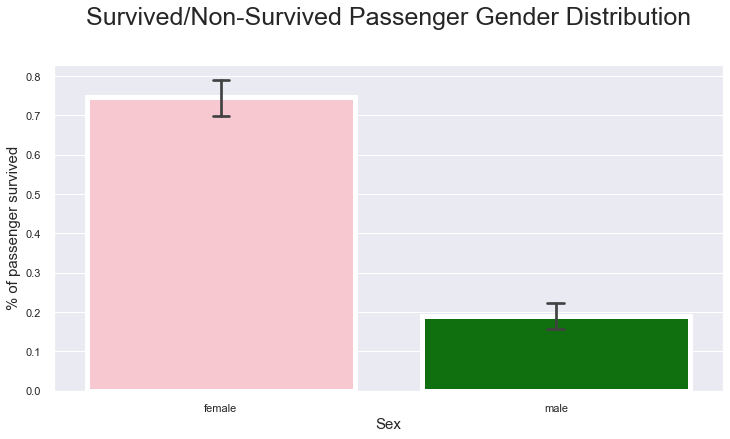

In [50]:
import seaborn as sns
pal = {'male':"green", 'female':"Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize = (12,6))
ax = sns.barplot(x = "Sex", 
                 y = "Survived", 
                 data=df_train, 
                 palette = pal,
                 linewidth=5,
                 order = ['female','male'],
                 capsize = .05,

                )

plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of passenger survived", fontsize = 15, )
plt.xlabel("Sex",fontsize = 15);



This bar plot above shows the distribution of female and male survived. The x_label represents Sex feature while the y_label represents the % of passenger survived. This bar plot shows that ~74% female passenger survived while only ~19% male passenger survived.

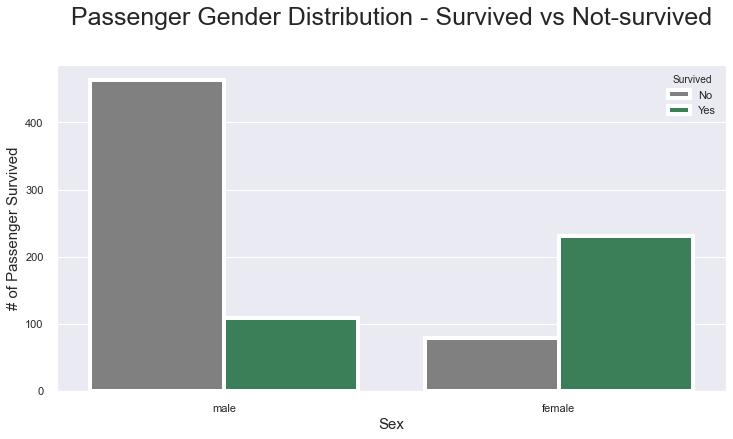

In [51]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (12,6))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = df_train, 
                   linewidth=4, 
                   palette = pal
)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25, pad=40)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

This count plot shows the actual distribution of male and female passengers that survived and did not survive. It shows that among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived and ~480 did not survive. 

**Summary**
***
- As we suspected, female passengers have survived at a much better rate than male passengers. 
- It seems about right since females and children were the priority. 

## 3b. Pclass and Survived
<a id="pcalss_and_survived"></a>
***

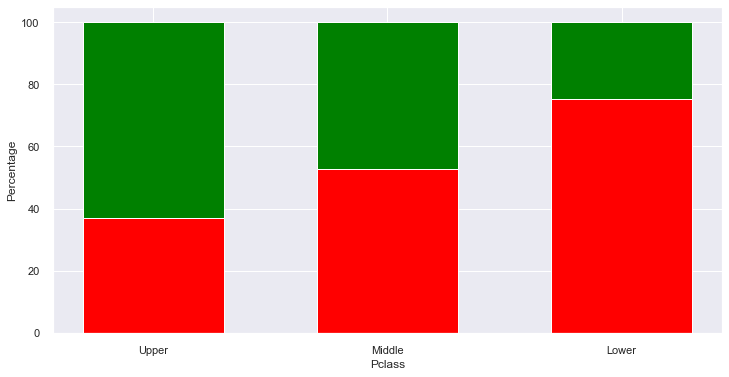

In [52]:
temp = df_train[['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass', 'Survived']).count().reset_index()
temp_df = pd.pivot_table(temp, values = 'PassengerId', index = 'Pclass',columns = 'Survived')
names = ['No', 'Yes']
temp_df.columns = names
r = [0,1,2]
totals = [i+j for i, j in zip(temp_df['No'], temp_df['Yes'])]
No_s = [i / j * 100 for i,j in zip(temp_df['No'], totals)]
Yes_s = [i / j * 100 for i,j in zip(temp_df['Yes'], totals)]
## Plotting
plt.subplots(figsize = (12,6))
barWidth = 0.60
names = ('Upper', 'Middle', 'Lower')
# Create green Bars
plt.bar(r, No_s, color='Red', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, Yes_s, bottom=No_s, color='Green', edgecolor='white', width=barWidth)

 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Pclass")
plt.ylabel('Percentage')
 
# Show graphic
plt.show()

# green colour = Survived and red colour = NOT Survived

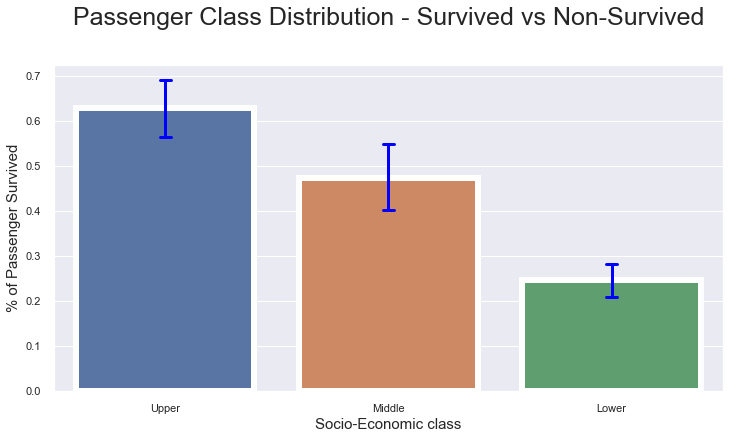

In [53]:
plt.subplots(figsize = (12,6))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=df_train, 
            linewidth=6,
            capsize = .05,
            errcolor='blue',
            errwidth = 3
            

           )
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25, pad=40)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
names = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, names);

- It looks like ...
    - ~ 63% first class passenger survived titanic tragedy, while 
    - ~ 48% second class and 
    - ~ only  24% third class passenger survived. 



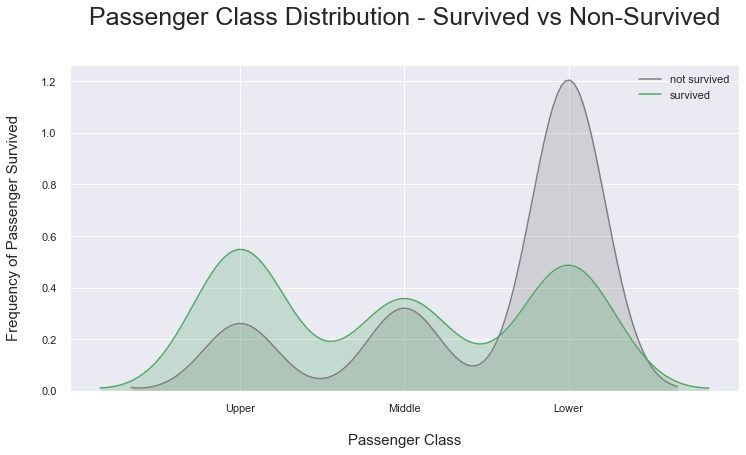

In [54]:
# Kernel Density Plot
fig = plt.figure(figsize=(12,6),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(df_train.Pclass[df_train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(df_train.loc[(df_train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived', 
              )
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(df_train.Pclass.unique()), labels);

This KDE plot is pretty self-explanatory with all the labels and colors. Something I have noticed that some readers might find questionable is that the lower class passengers have survived more than second-class passengers. It is true since there were a lot more third-class passengers than first and second. 

**Summary**
***
The first class passengers had the upper hand during the tragedy. You can probably agree with me more on this, in the next section of visualizations where we look at the distribution of ticket fare and survived column. 

## 3c. Fare and Survived
<a id="fare_and_survived"></a>
***

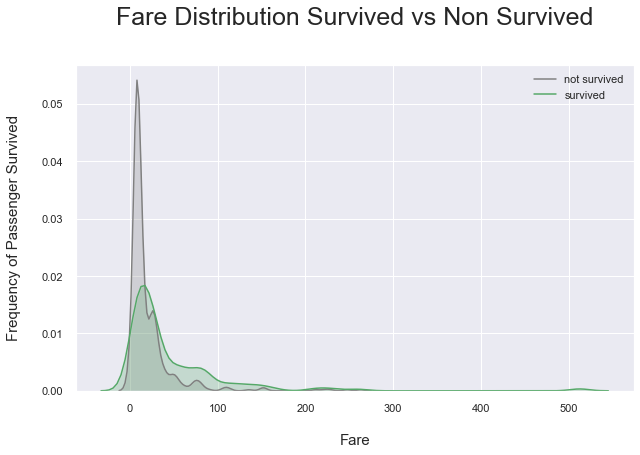

In [55]:
# Kernel Density Plot
fig = plt.figure(figsize=(10,6),)
ax=sns.kdeplot(df_train.loc[(df_train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(df_train.loc[(df_train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);



This plot shows something impressive..
- The spike in the plot under 100 dollar represents that a lot of passengers who bought the ticket within that range did not survive. 
- When fare is approximately more than 280 dollars, there is no gray shade which means, either everyone passed that fare point survived or maybe there is an outlier that clouds our judgment. Let's check...

In [56]:
df_train[df_train.Fare > 280]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
253,259,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,NaN,C,1
672,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B51 B53 B55,C,1
730,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B101,C,1


As we assumed, it looks like an outlier with a fare of $512. We sure can delete this point. However, we will keep it for now.  

c:\users\hp\anaconda3\envs\newml\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


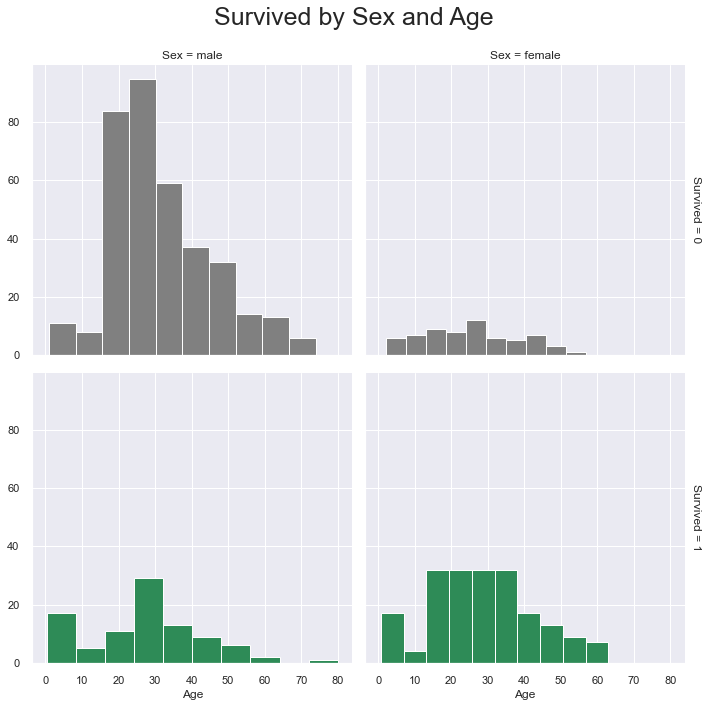

In [58]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(df_train,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)


Facetgrid is a great way to visualize multiple variables and their relationships at once. From the chart in section 3a we have a intuation that female passengers had better prority than males during the tragedy. However, from this facet grid, we can also understand which age range groups survived more than others or were not so lucky 

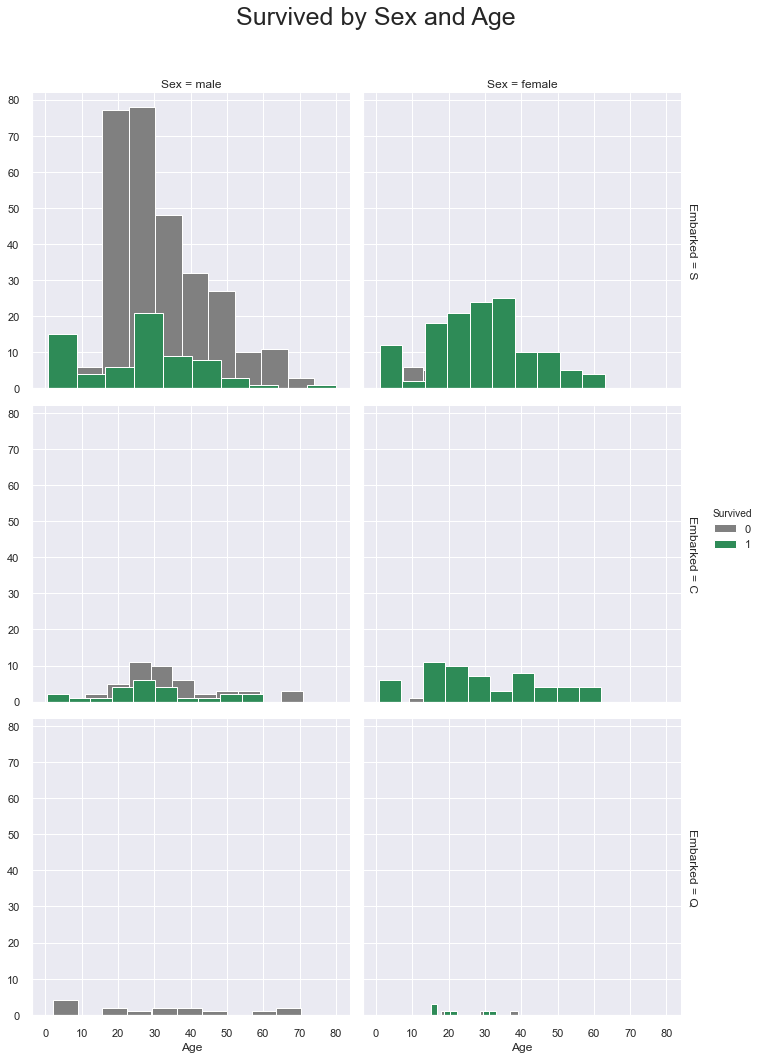

In [59]:
g = sns.FacetGrid(df_train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

This is another compelling facet grid illustrating four features relationship at once. They are **Embarked, Age, Survived & Sex**. 
* The color illustrates passengers survival status(green represents survived, gray represents not survived)
* The column represents Sex(left being male, right stands for female)
* The row represents Embarked(from top to bottom: S, C, Q)
***
Now that I have steered out the apparent let's see if we can get some insights that are not so obvious as we look at the data. 
* Most passengers seem to be boarded on Southampton(S).
* More than 60% of the passengers died boarded on Southampton. 
* More than 60% of the passengers lived boarded on Cherbourg(C).
* Pretty much every male that boarded on Queenstown(Q) did not survive. 
* There were very few females boarded on Queenstown, however, most of them survived. 

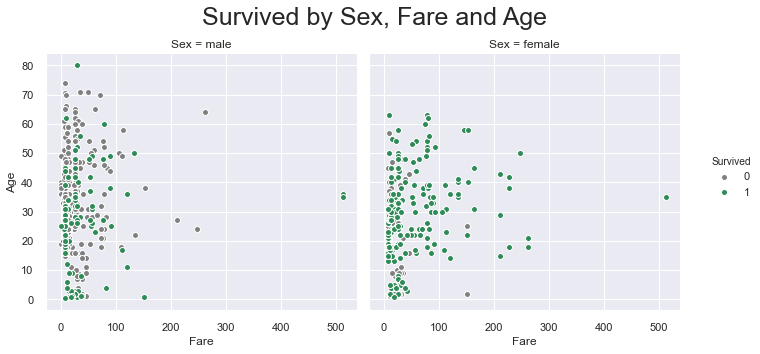

In [60]:
g = sns.FacetGrid(df_train, size=5,hue="Survived", col ="Sex", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

This facet grid unveils a couple of interesting insights. Let's find out.
* The grid above clearly demonstrates the three outliers with Fare of over \$500. At this point, I think we are quite confident that these outliers should be deleted.
* Most of the passengers were with in the Fare range of \$100. 

c:\users\hp\anaconda3\envs\newml\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\hp\anaconda3\envs\newml\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


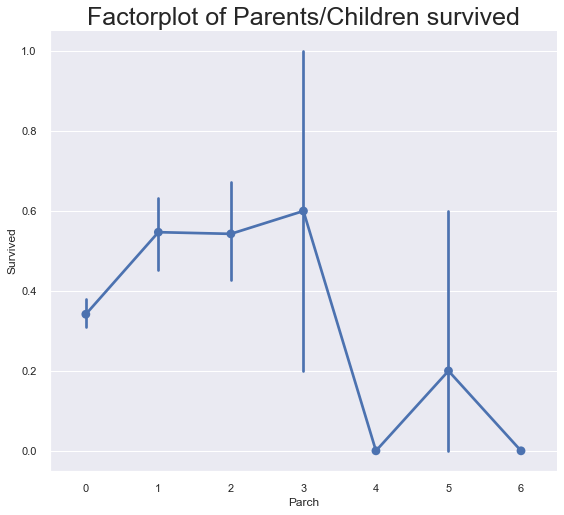

In [61]:
## dropping the three outliers where Fare is over $500 
df_train = df_train[df_train.Fare < 500]
## factor plot
sns.factorplot(x = "Parch", y = "Survived", data = df_train,kind = "point",size = 8)
plt.title("Factorplot of Parents/Children survived", fontsize = 25)
plt.subplots_adjust(top=0.85)

**Passenger who traveled in big groups with parents/children had less survival rate than other passengers.**

c:\users\hp\anaconda3\envs\newml\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\hp\anaconda3\envs\newml\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


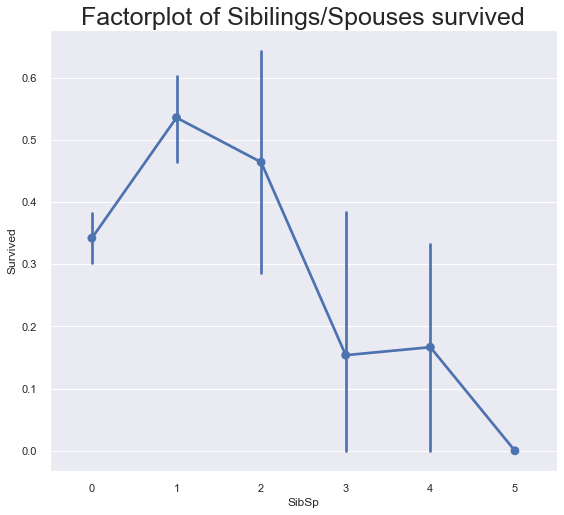

In [62]:
sns.factorplot(x =  "SibSp", y = "Survived", data = df_train,kind = "point",size = 8)
plt.title('Factorplot of Sibilings/Spouses survived', fontsize = 25)
plt.subplots_adjust(top=0.85)

**While, passenger who traveled in small groups with sibilings/spouses had better changes of survivint than other passengers.**

In [63]:
# Placing 0 for female and 
# 1 for male in the "Sex" column. 
df_train['Sex'] = df_train.Sex.apply(lambda x: 0 if x == "female" else 1)
df_test['Sex'] = df_test.Sex.apply(lambda x: 0 if x == "female" else 1)

c:\users\hp\anaconda3\envs\newml\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
